<a href="https://colab.research.google.com/github/yuvi00001/Logistic-Regression-on-Titanic-Dataset/blob/main/Logistic_Regression_on_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Having overview of the data

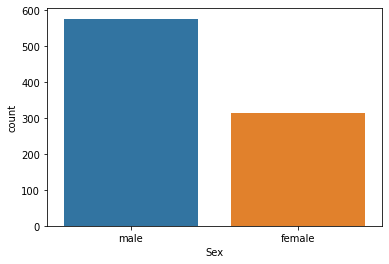

In [21]:
#number of males and females travelling

sns.countplot(x=train_data.Sex,data=train_data)

Males passengers travelling were almost double that of females passengers.

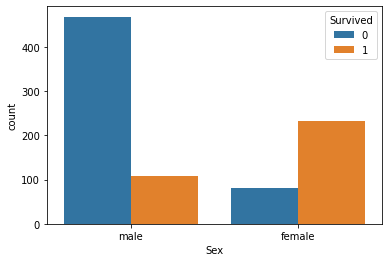

In [22]:
#number of males and female survived, where 0 = Not Survived and 1 = Survived
sns.countplot(x=train_data.Sex,hue=train_data.Survived,data=train_data)

From here we can understand that more number of male passengers didn't survived.

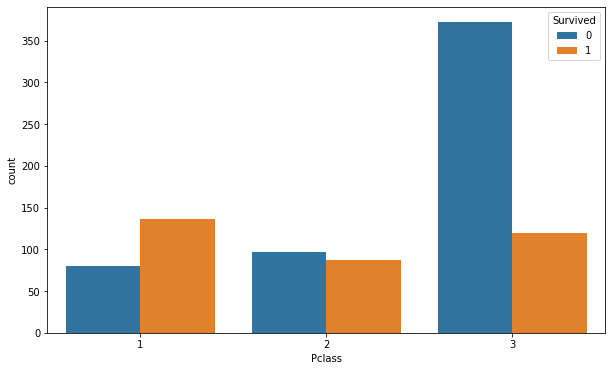

In [23]:
#finding a relation between Pclass and Survived
plt.figure(figsize=(10,6))
sns.countplot(x=train_data.Pclass,hue=train_data.Survived,data=train_data)

More passengers from the 3rd class ticket category didn't made it to survival while survival rate was thhe highest from passengers with 1st class ticket.

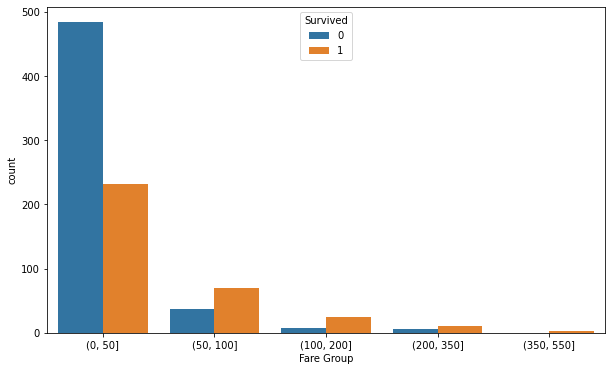

In [24]:
#correlation between Survived and Fare

train_data['Fare Group'] = pd.cut(train_data.Fare,bins=[0,50,100,200,350,550])
plt.figure(figsize=(10,6))
sns.countplot(x=train_data['Fare Group'],hue=train_data.Survived,data=train_data)

Maximun casualities were in the group who had their Fare between 0-50

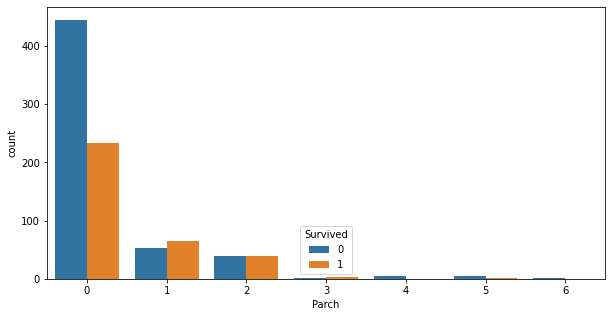

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_data.Parch,hue=train_data.Survived,data=train_data)

Relation between Parch and Survived

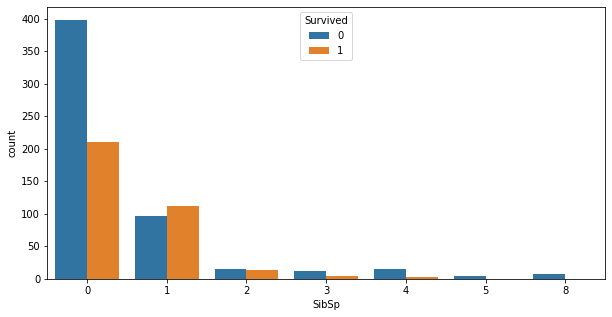

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_data.SibSp,hue=train_data.Survived,data=train_data)

Relation between SibSp and Survived

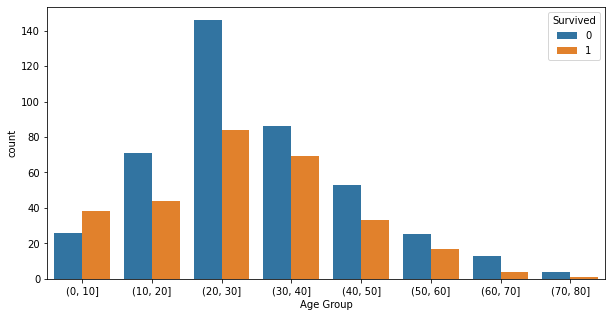

In [27]:
plt.figure(figsize=(10,5))
train_data['Age Group'] = pd.cut(train_data.Age,bins=[0,10,20,30,40,50,60,70,80])
sns.countplot(x=train_data['Age Group'],hue=train_data.Survived,data=train_data)

**Checking for NaN values**

In [28]:
#checking for NaN values

columns = train_data.columns
j = 0

for i in range(len(columns)):
    missing_values = train_data[train_data.columns[i]].isnull().sum()
    if missing_values > 0:
        percentage = missing_values/len(train_data)*100
        j+=1
        print('{}. {} has {} missing values, {}%'.format(j,columns[i],missing_values,percentage))

1. Age has 177 missing values, 19.865319865319865%
2. Cabin has 687 missing values, 77.10437710437711%
3. Embarked has 2 missing values, 0.22446689113355783%
4. Fare Group has 15 missing values, 1.6835016835016834%
5. Age Group has 177 missing values, 19.865319865319865%


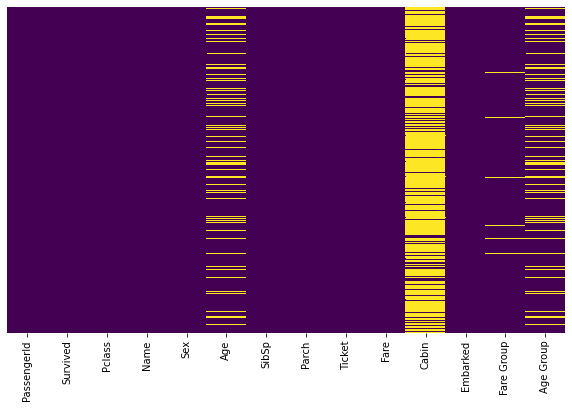

In [29]:
#heatmap for NaN values
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

We will drop the Cabin column as it has too many NaN values

For Age column, we can either fill the missing values with **mean** or we can always drop the column.

**Preparing the data to feed it to the model**

In [30]:
train_data.drop(columns=['PassengerId','Name','Ticket','Cabin','Fare Group','Age Group'],axis='columns',inplace=True)
test_data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True) 

train_data = pd.get_dummies(train_data,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_data = pd.get_dummies(test_data,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [31]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


Filling the **missing** value in **Age** column using **prediction** with **Linear Regression Model**

In [32]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

copy = train_data[['Age','Pclass_2','Pclass_3','SibSp','Parch']]
test_copy = copy[copy.Age.isnull()]
test_copy.drop(columns='Age',axis='columns',inplace=True)
copy.dropna(inplace=True)
y_copy = copy.Age
x_copy = copy.drop(columns='Age',axis='columns')

linear.fit(x_copy,y_copy)
age_pred = linear.predict(test_copy)
train_data.loc[train_data.Age.isnull(),'Age'] = age_pred

#now doing the same with test_data

test_copy = test_data[['Age','Pclass_2','Pclass_3','SibSp','Parch']]
test_copy = test_copy[test_copy.Age.isnull()]
test_copy.drop(columns='Age',axis='columns',inplace=True)
age_pred = linear.predict(test_copy)

test_data.loc[test_data.Age.isnull(),'Age'] = age_pred
test_data.dropna(inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now we'll perform **Logistic Regression** on **train_data** to predict **Survived** column.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


lr = LogisticRegression()
X = train_data.drop(columns='Survived',axis='columns')
Y = train_data.Survived
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

lr.fit(x_train,y_train)
prediction = lr.predict(x_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Classification Report**

In [34]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.85      0.87      0.86       174\n           1       0.74      0.71      0.73        94\n\n    accuracy                           0.81       268\n   macro avg       0.80      0.79      0.79       268\nweighted avg       0.81      0.81      0.81       268\n'

**Confusion Matrix**

In [35]:
confusion_matrix(y_test,prediction)

array([[151,  23],
       [ 27,  67]])

**Accuracy Score**

In [36]:
accuracy_score(y_test,prediction)

0.8134328358208955

Now making **Prediction** on the **test data**

In [37]:
test_prediction = lr.predict(test_data)


In [39]:
test_data['Predicted Survived'] = test_prediction
test_data.head(20)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Predicted Survived
0,34.50000,0,0,7.8292,0,1,1,1,0,0
1,47.00000,1,0,7.0000,0,1,0,0,1,0
2,62.00000,0,0,9.6875,1,0,1,1,0,0
3,27.00000,0,0,8.6625,0,1,1,0,1,0
4,22.00000,1,1,12.2875,0,1,0,0,1,1
5,14.00000,0,0,9.2250,0,1,1,0,1,0
6,30.00000,0,0,7.6292,0,1,0,1,0,1
7,26.00000,1,1,29.0000,1,0,1,0,1,0
8,18.00000,0,0,7.2292,0,1,0,0,0,1
9,21.00000,2,0,24.1500,0,1,1,0,1,0
